## Análise exploratória dos dados

<style>
    table.dataframe {
        font-size: 10px;
    }
</style>

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [126]:
pd.set_option('display.max_rows', None)              
pd.set_option('display.max_columns', None)          
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set_theme(style="white", palette="deep", context="talk",font_scale=0.8)
plt.rcParams['figure.figsize'] = (12, 6)

In [127]:
object_columns = ['Protocolo_S2iD', 'Nome_Municipio', 'Sigla_UF', 'regiao',
                  'Setores Censitários', 'Status', 'DH_Descricao', 'DM_Descricao',
                  'DA_Descricao', 'DA_Polui/cont da água', 'DA_Polui/cont do ar',
                  'DA_Polui/cont do solo', 'DA_Dimi/exauri hídrico',
                  "DA_Incêndi parques/APA's/APP's", 'PEPL_Descricao', 'PEPR_Descricao',
                  'Categoria', 'Grupo', 'Subgrupo', 'Tipo', 'Subtipo']

dtype = {col: 'object' for col in object_columns}

df_eventos = pd.read_csv(
    "https://raw.githubusercontent.com/brunagmoura/PrevisorReconhecimento/refs/heads/main/df_eventos_desastres_rec_nrec.csv",
    sep=';',
    decimal=',',
    dtype=dtype)

df_eventos.head(5)


,Protocolo_S2iD,Nome_Municipio,Sigla_UF,regiao,Data_Registro,Data_Evento,codigo_ibge,Setores Censitários,Status,DH_Descricao,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Descricao,DM_Uni Habita Danificadas,DM_Uni Habita Destruidas,DM_Uni Habita Valor,DM_Inst Saúde Danificadas,DM_Inst Saúde Destruidas,DM_Inst Saúde Valor,DM_Inst Ensino Danificadas,DM_Inst Ensino Destruidas,DM_Inst Ensino Valor,DM_Inst Serviços Danificadas,DM_Inst Serviços Destruidas,DM_Inst Serviços Valor,DM_Inst Comuni Danificadas,DM_Inst Comuni Destruidas,DM_Inst Comuni Valor,DM_Obras de Infra Danificadas,DM_Obras de Infra Destruidas,DM_Obras de Infra Valor,DM_total_danos_materiais,DA_Descricao,DA_Polui/cont da água,DA_Polui/cont do ar,DA_Polui/cont do solo,DA_Dimi/exauri hídrico,DA_Incêndi parques/APA's/APP's,PEPL_Descricao,PEPL_Assis_méd e emergên(R$),PEPL_Abast de água pot(R$),PEPL_sist de esgotos sanit(R$),PEPL_Sis limp e rec lixo (R$),PEPL_Sis cont pragas (R$),PEPL_distrib energia (R$),PEPL_Telecomunicações (R$),PEPL_Tran loc/reg/l_curso (R$),PEPL_Distrib combustíveis(R$),PEPL_Segurança pública (R$),PEPL_Ensino (R$),PEPL_total_publico,PEPR_Descricao,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Empenhado,DensidadePop,Hab,Area,Ano,PIB,Categoria,Grupo,Subgrupo,Tipo,Subtipo,COBRADE
0,SC-F-4200903-12200-20141226,Angelina,SC,Sul,2015-01-02 00:00:00,2015-01-02,4200903,NaN,Reconhecido,"Moradores da comunidade que ficarem desprovidos de locomoção, trafegabilidade e acessos.",0,0,0,0,0,0,1500,1500,"Os danos são representados pelas avarias/destruições acentuadas resultantes nas estradas/pontes vicinais do município, em virtude das enxurradas, que resultaram na erosão/deslocamento acentuado do saibro alocado nas estradas, bem como em sérios danos aos sistemas de drenagens/pontes de madeira/concreto, em que algumas foram arrancadas em sua totalidade, além da queda de barreiras e do estreitamento das pistas de rolamento das estradas vicinais, devido ao avanço do leito do rio.\n\nAdemais, houve danos às residências localizadas no entorno do rio, bem como à unidade de saúde/escola/galpão comunitário da Comunidade do Rio Novo, principalmente devido à interrupção do acesso e dos serviços ofertados.",0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,"No caso exposto, os prejuízos públicos são representados pelo aumento de demandas na área de saúde, resultantes da disponibilização de equipes de saúde e implantação de plantões, para atendimento à população, além do fornecimento de medicamentes, bem como a realização de ação/campanha de combate a leptospirose. \n\nAdemais, são necessários dispêndios acentuados para limpeza de vias públicas e rios, visando à retirada de entulhos, bem como para restabelecimentos dos sistemas de comunicação/energia.",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"Quebra/perda da produção agrícola/pecuária, ocasionada pelo não escoamento da produção, em virtude da interrupção do trafego de veículos, devido ao alagamento de vias públicas.",0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,10.72,"5,358.00",500.00,"2,015.00","103,375.00",Natural,Hidrológico,Enxurradas,NaN,NaN,12200
1,MS-F-5000708-12200-20141222,Anastácio,MS,Centro-oeste,2015-01-05 00:00:00,2015-01-05,5000708,NaN,Reconhecido,Ficaram prejudicados um total de 800 famílias que encontram-se em situação de isolamento total sem condições de escoarem seus produtos diversos da agricultura familiar e sem condições de locomoção.,0,0,0,0,0,0,3200,3200,"Foram danificadas tum total de 8 pontes que interligam esses locais através destas estradas, 05 (cinco) foram danificadas e 03 (três) totalmente destruídas e vários trechos das estradas vicinais e entornos.",0,0,0.00,0.00,0,0.00,0.00,0,0.00,0,0,0.00,0,0,0.00,0.00,0.00,"6,271,293.52","6,271,293.52",NaN,NaN,NaN,NaN,NaN,NaN,"Foram danificadas

### Análise preliminar dos dados

#### Todos as variáveis

In [128]:
df_eventos.dtypes.reset_index().rename(columns={0: '.dtype', 'index': 'Variável'})

,Variável,.dtype
0,Protocolo_S2iD,object
1,Nome_Municipio,object
2,Sigla_UF,object
3,regiao,object
4,Data_Registro,object
5,Data_Evento,object
6,codigo_ibge,int64
7,Setores Censitários,object
8,Status,object
9,DH_Descricao,object


In [129]:
display(df_eventos.describe())

,codigo_ibge,DH_MORTOS,DH_FERIDOS,DH_ENFERMOS,DH_DESABRIGADOS,DH_DESALOJADOS,DH_DESAPARECIDOS,DH_OUTROS AFETADOS,DH_total_danos_humanos,DM_Uni Habita Danificadas,DM_Uni Habita Destruidas,DM_Uni Habita Valor,DM_Inst Saúde Danificadas,DM_Inst Saúde Destruidas,DM_Inst Saúde Valor,DM_Inst Ensino Danificadas,DM_Inst Ensino Destruidas,DM_Inst Ensino Valor,DM_Inst Serviços Danificadas,DM_Inst Serviços Destruidas,DM_Inst Serviços Valor,DM_Inst Comuni Danificadas,DM_Inst Comuni Destruidas,DM_Inst Comuni Valor,DM_Obras de Infra Danificadas,DM_Obras de Infra Destruidas,DM_Obras de Infra Valor,DM_total_danos_materiais,PEPL_Assis_méd e emergên(R$),PEPL_Abast de água pot(R$),PEPL_sist de esgotos sanit(R$),PEPL_Sis limp e rec lixo (R$),PEPL_Sis cont pragas (R$),PEPL_distrib energia (R$),PEPL_Telecomunicações (R$),PEPL_Tran loc/reg/l_curso (R$),PEPL_Distrib combustíveis(R$),PEPL_Segurança pública (R$),PEPL_Ensino (R$),PEPL_total_publico,PEPR_Agricultura (R$),PEPR_Pecuária (R$),PEPR_Indústria (R$),PEPR_Comércio (R$),PEPR_Serviços (R$),PEPR_total_privado,PE_PLePR,Empenhado,DensidadePop,Hab,Area,Ano,PIB,COBRADE
count,"18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","18,346.00","3,874.00","18,346.00","18,346.00","18,346.00","12,531.00","12,531.00","18,346.00"
mean,"3,151,875.46",0.06,2.05,35.36,28.71,150.91,0.05,"7,876.58","8,093.71",67.53,13.96,"1,328,044.81",0.59,14.91,"37,172.42",0.55,0.16,"70,568.17",0.07,0.13,"18,226.66",0.33,0.28,"31,173.09","1,064.26",45.91,"1,184,294.23","2,669,479.37","55,199.78","858,374.57","93,775.29","44,001.55","6,631.16","11,938.63","2,716.15","294,856.19","6,493.67","8,654.46","39,976.85","1,422,618.29","9,520,349.25","2,885,995.59","270,632.25","2,823,718.94","257,060.75","15,757,756.77","17,180,375.06","1,430,746.18",78.76,"32,119.27","1,955.60","2,018.22","956,980.26","13,664.66"
std,"919,072.67",1.05,49.68,462.83,341.13,"1,139.68",3.06,"31,693.55","31,860.91",781.60,405.96,"54,128,508.58",12.23,223.66,"660,906.46",3.88,1.78,"1,166,653.94",0.90,1.46,"697,616.64",8.01,15.81,"529,455.23","137,895.78","4,268.42","11,318,959.74","58,584,307.69","642,085.22","9,240,067.62","1,758,398.69","451,622.96","239,266.38","212,395.35","84,174.10","3,869,242.11","187,676.55","447,759.86","468,539.50","10,724,790.94","44,531,673.82","12,550,669.24","5,920,759.90","109,799,346.91","7,121,982.47","124,550,166.98","125,625,744.93","5,109,620.26",403.39,"158,346.38","7,011.80",2.01,"10,877,228.71",972.87
min,"1,100,015.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,"1,010.00",3.56,"2,015.00","14,761.00","11,110.00"
25%,"2,506,905.00",0.00,0.00,0.00,0.00,0.00,0.00,620.00,814.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"138,162.18","129,783.74",11.14,"5,812.00",218.59,"2,017.00","77,437.50","13,214.00"
50%,"2,929,800.00",0.00,0.00,0.00,0.00,0.00,0.00,"3,071.00","3,252.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,389.85",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"100,000.00","651,954.15","83,083.17",0.00,0.00,0.00,"1,830,779.90","2,892,670.31","364,817.70",22.51,"12,004.00",479.81,"2,018.00","165,416.00","14,110.00"
75%,"4,202,875.00",0.00,0.

#### Variáveis independentes (features)

In [130]:
#Verificar se há protocolos duplicados

df_eventos["Protocolo_S2iD"].duplicated().sum()

np.int64(0)

Não há protocolos duplicados

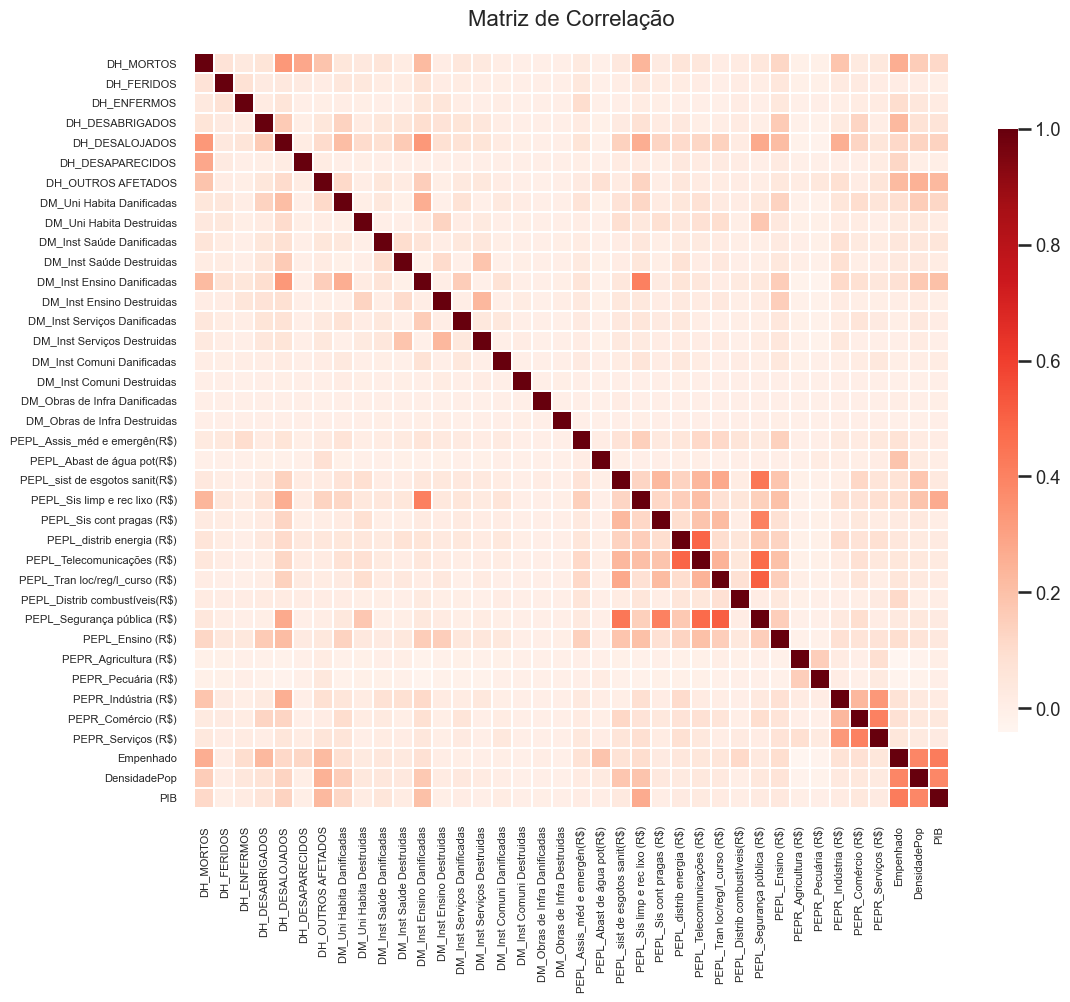

In [131]:
# Correlação entre as variáveis independentes

variaveisnum_todas = [
    'DH_MORTOS', 'DH_FERIDOS', 'DH_ENFERMOS', 'DH_DESABRIGADOS', 'DH_DESALOJADOS', 'DH_DESAPARECIDOS', 'DH_OUTROS AFETADOS',
    'DM_Uni Habita Danificadas', 'DM_Uni Habita Destruidas',  
    'DM_Inst Saúde Danificadas', 'DM_Inst Saúde Destruidas', 
    'DM_Inst Ensino Danificadas', 'DM_Inst Ensino Destruidas',  
    'DM_Inst Serviços Danificadas', 'DM_Inst Serviços Destruidas',  
    'DM_Inst Comuni Danificadas', 'DM_Inst Comuni Destruidas',  
    'DM_Obras de Infra Danificadas', 'DM_Obras de Infra Destruidas', 
    'PEPL_Assis_méd e emergên(R$)', 'PEPL_Abast de água pot(R$)', 'PEPL_sist de esgotos sanit(R$)', 
    'PEPL_Sis limp e rec lixo (R$)', 'PEPL_Sis cont pragas (R$)', 'PEPL_distrib energia (R$)', 
    'PEPL_Telecomunicações (R$)', 'PEPL_Tran loc/reg/l_curso (R$)', 'PEPL_Distrib combustíveis(R$)', 
    'PEPL_Segurança pública (R$)', 'PEPL_Ensino (R$)', 'PEPR_Agricultura (R$)', 
    'PEPR_Pecuária (R$)', 'PEPR_Indústria (R$)', 'PEPR_Comércio (R$)', 'PEPR_Serviços (R$)',
    'Empenhado', 'DensidadePop', 'PIB'
]

df_corr_todas = df_eventos[variaveisnum_todas]

correlacao_todas = df_corr_todas.corr()

plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlacao_todas, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.2, 
    linecolor='white',
    cbar_kws={"shrink": 0.8, "aspect": 30},
    square=True
)
plt.title('Matriz de Correlação', fontsize=16, pad=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

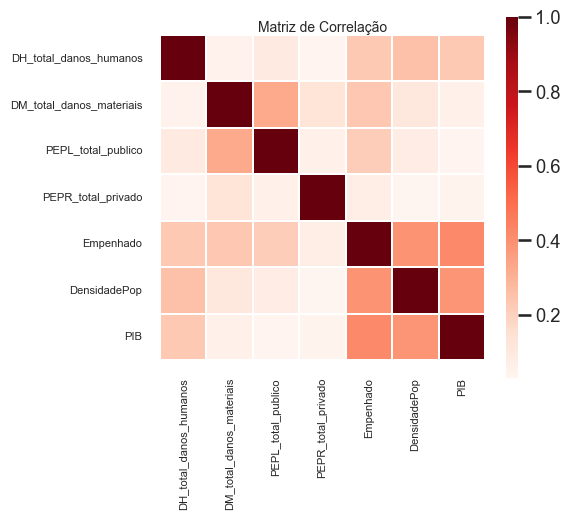

In [132]:
variaveisnum_selecionadas = [
    'DH_total_danos_humanos', 'DM_total_danos_materiais', 'PEPL_total_publico', 'PEPR_total_privado', 'Empenhado', 'DensidadePop', 'PIB'
]

df_corr_selecionadas = df_eventos[variaveisnum_selecionadas]

correlacao_selecionadas = df_corr_selecionadas.corr()

plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(
    correlacao_selecionadas, 
    cmap="Reds", 
    annot=False, 
    linewidths=0.2, 
    linecolor='white',
    cbar_kws={"shrink": 0.8, "aspect": 30},
    square=True
)
plt.title('Matriz de Correlação', fontsize=10, pad=2)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

#### Variável dependente (target)

In [133]:
status_counts = df_eventos['Status'].value_counts()
print("\nDistribuição da variável 'Status':")
display(status_counts)


Distribuição da variável 'Status':


Status
Reconhecido        16483
Não reconhecido     1863
Name: count, dtype: int64

Há desbalanceamento entre o status "Reconhecido" e "Não reconhecido", o qual deverá ser tratado na etapa de pré-processamento dos dados.

### Dados ausentes

In [134]:
df_na_counts = df_eventos.isna().sum().reset_index().rename(columns={0: 'Qtde. dados ausentes', 'index': 'Variável'})
df_na_counts['% de dados ausentes'] = (df_na_counts['Qtde. dados ausentes'] / len(df_eventos)) * 100
df_na_counts['Qtde. dados ausentes'] = df_na_counts['Qtde. dados ausentes'].astype(int)
df_na_counts = df_na_counts.sort_values(by='% de dados ausentes', ascending=False)
df_na_counts

,Variável,Qtde. dados ausentes,% de dados ausentes
40,DA_Polui/cont do ar,18213,99.28
41,DA_Polui/cont do solo,17991,98.06
39,DA_Polui/cont da água,17371,94.69
43,DA_Incêndi parques/APA's/APP's,17009,92.71
42,DA_Dimi/exauri hídrico,16668,90.85
65,Empenhado,14472,78.88
75,Subtipo,13031,71.03
18,DM_Descricao,6451,35.16
70,PIB,5815,31.70
69,Ano,5815,31.70


Existem variáveis com quantidade de dados ausentes superior a 5%. Essas variáveis serão tratadas no pré-processamento.

#### Dados ausentes em relação à renda do município
Foi levantada a preocupação pelo grupo de que municípios de menor capacidade econômica poderiam ter mais dificuldade em acessar o sistema e preencher todas as informações solicitadas. Por esse motivo, foi realizada análise sobre o perfil econômico dos municípios que não preencheram todas as informações.

A análise a seguir considera as relação da ausência de informação nas variáveis DA_Polui/con do ar; DA_Polui/cont do solo; DA_Polui/cont da água; DA_Incênd parques APA's/APP's; DA_Dimi/exauri hídrico; DM_Descricao; DA_Descricao; PEPL_Descricao; PEPR_Descricao; DH_Descricao e o PIB do município.

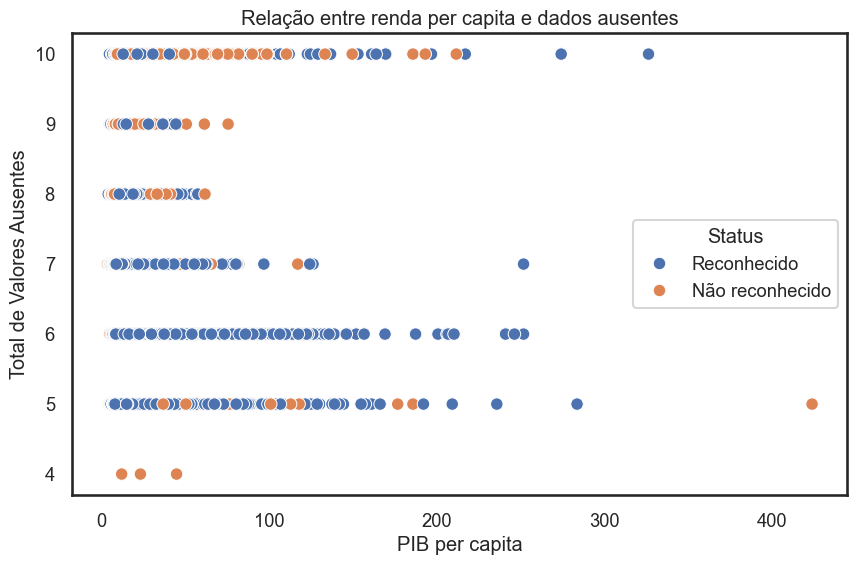

In [135]:
colunas = [
    'DA_Polui/cont do ar', 
    'DA_Polui/cont do solo', 
    'DA_Polui/cont da água', 
    "DA_Incêndi parques/APA's/APP's", 
    'DA_Dimi/exauri hídrico', 
    'DM_Descricao', 
    'DA_Descricao', 
    'PEPL_Descricao', 
    'PEPR_Descricao', 
    'DH_Descricao'
]

df_eventos_missing = df_eventos.copy()

df_eventos_missing = df_eventos_missing.dropna(subset=['PIB'])
#Existem dados para o PIB apenas até 2022.

df_eventos_missing['Total_Missing'] = df_eventos_missing[colunas].isnull().sum(axis=1)
df_eventos_missing['PIB_per_capita'] = df_eventos_missing['PIB'] / df_eventos_missing['Hab']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PIB_per_capita', y='Total_Missing', data=df_eventos_missing, hue='Status', palette='deep')
plt.title('Relação entre renda per capita e dados ausentes')
plt.xlabel('PIB per capita')
plt.ylabel('Total de Valores Ausentes')
plt.show()


In [136]:
correlation = df_eventos_missing['PIB_per_capita'].corr(df_eventos_missing['Total_Missing'])
print(f"\nCorrelação entre renda per capita e total de valores ausentes: {correlation:.2f}")


Correlação entre renda per capita e total de valores ausentes: 0.11


Correlação baixa entre os valores ausentes nas variáveis DA_Polui/con do ar; DA_Polui/cont do solo; DA_Polui/cont da água; DA_Incênd parques APA's/APP's; DA_Dimi/exauri hídrico; DM_Descricao; DA_Descricao; PEPL_Descricao; PEPR_Descricao; DH_Descricao e a renda per capita do município.

### PIB x Status

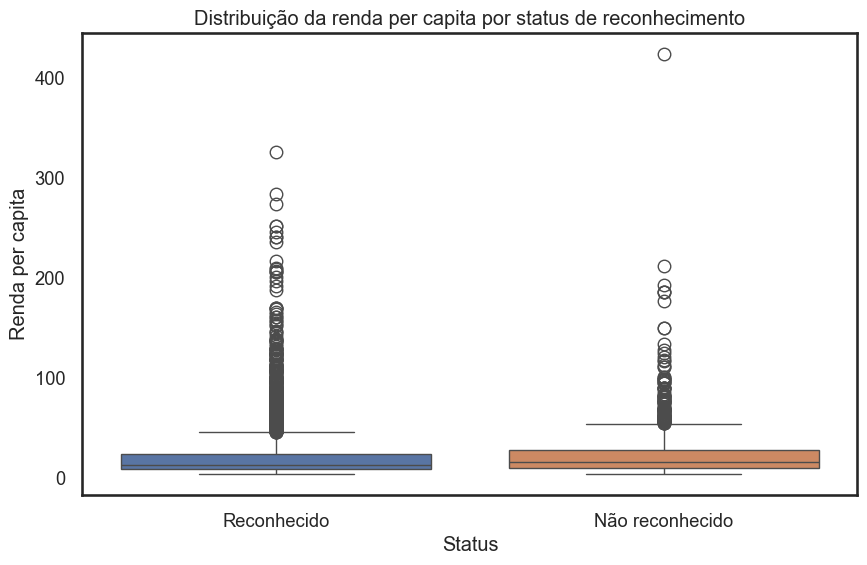

In [137]:
df_eventos_apos2022 = df_eventos.copy()

df_eventos_apos2022 = df_eventos_apos2022.dropna(subset=['PIB'])
#Existem dados para o PIB apenas até 2022.

df_eventos_apos2022['PIB_per_capita'] = df_eventos_apos2022['PIB'] / df_eventos_apos2022['Hab']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='PIB_per_capita', data=df_eventos_apos2022, palette='deep', order=status_counts.index)
plt.title('Distribuição da renda per capita por status de reconhecimento')
plt.xlabel('Status')
plt.ylabel('Renda per capita')
plt.xticks(rotation=0)
plt.show()

Grande quantidade de outliers tanto nos protocolos reconhecimentos como estado de calamidade pública ou situação de emergência.

In [ ]:
#Eliminando-se os outliers abaixo de 1% e acima de 99% para enxergar melhor a distribuição

q1 = df_eventos_apos2022['PIB_per_capita'].quantile(0.01)
q99 = df_eventos_apos2022['PIB_per_capita'].quantile(0.99)

df_eventos_filtrado = df_eventos_apos2022[(df_eventos_apos2022['PIB_per_capita'] >= q1) & (df_eventos_apos2022['PIB_per_capita'] <= q99)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='PIB_per_capita', data=df_eventos_filtrado, palette='deep', order=status_counts.index)
plt.title('Distribuição da renda per capita (sem outliers) por status de reconhecimento')
plt.xlabel('Status')
plt.ylabel('Renda per capita')
plt.xticks(rotation=0)
plt.show()

Os municípios de maior renda per capita pertencem a não receber o reconhecimento do estado de calamidade pública ou situação de emergência.